In [1]:
!pip install telethon

You should consider upgrading via the 'D:\hacktons\diskra_3sem\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
from telethon import TelegramClient

api_id = 
api_hash = ''
username = ''
client = TelegramClient(username, api_id, api_hash, system_version="4.16.30-vxRUSAKOVNIKITA")
await client.start()

Signed in successfully as Nikita Rusakov; remember to not break the ToS or you will risk an account ban!


## Анализ группы

In [24]:
group_username = 'ya_training_ml'

### Кол-во пользователей в группе

In [ ]:
users = await client.get_participants(group_username)
print(f'Кол-во пользователей в группе: {len(users)}')

### Число пользователей с открытым номером телефона 

In [32]:
users_with_phones = [user for user in users if user.phone]
num_users_with_phones = len(users_with_phones)
print(f"Число пользователей с открытыми номерами телефонов: {num_users_with_phones}")

Число пользователей с открытыми номерами телефонов: 235


### Подсчитать количество пользователей с Telegram Premium

In [38]:
users_premium = [user for user in users if user.premium]
num_users_premium = len(users_premium)
print(f"Количество пользователей с Telegram Premium: {num_users_premium}")

Количество пользователей с Telegram Premium: 600


### Статистика имен пользователей в группе (Топ-20)

In [42]:
from collections import Counter

user_names = [user.first_name for user in users if user.first_name]
name_statistics = Counter(user_names)

C:\Users\Никита\AppData\Local\Temp\ipykernel_19572\4206708278.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Name', data=df_top_names, palette='viridis')


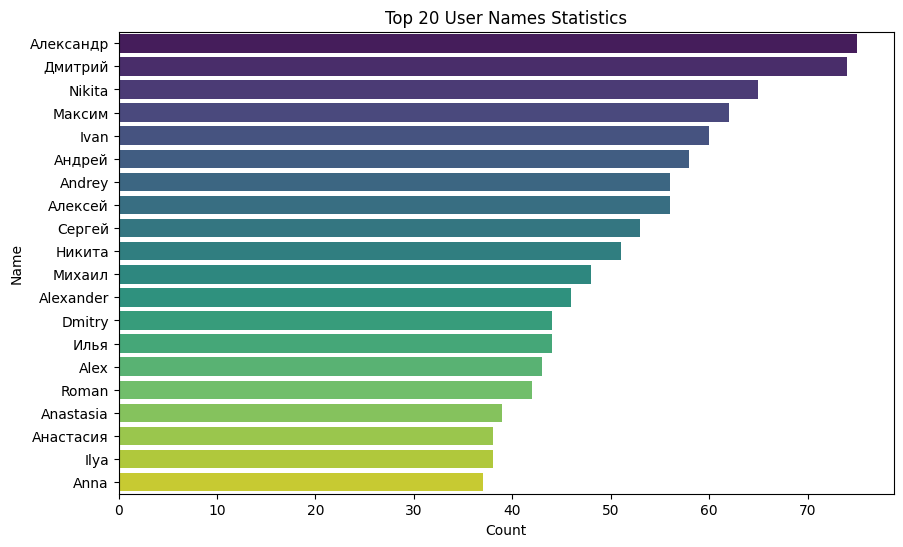

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_names = dict(sorted(name_statistics.items(), key=lambda item: item[1], reverse=True)[:20])

df_top_names = pd.DataFrame(list(top_names.items()), columns=['Name', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Name', data=df_top_names, palette='viridis')
plt.title('Top 20 User Names Statistics')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()


### Анализ профессий пользователей, основываясь на информации из раздела "О себе"

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download xx_ent_wiki_sm

In [113]:
test_user = users[0].username

In [ ]:
from telethon.tl.functions.users import GetFullUserRequest
from tqdm.auto import tqdm

bio_list = []
for user in tqdm(users):
    user_name = user.username
    full = await client(GetFullUserRequest(user_name))
    bio = full.full_user.about
    bio_list.append(bio)

In [120]:
bio_list = [x for x in bio_list if x is not None]

Покажу на примере нескольких описани, так как очень много запросов приходилось делать, боюсь получить бан за кол-во запросов

In [121]:
bio_list

['23 года, дизайнер из Санкт-Петербурга',
 'таланта на 0,33; learning_rate = 3e-4',
 '"either win or run away"🐅🐈\u200d⬛',
 'Все пишут тут фигню, и я напишу: diary_noname.t.me',
 'О компьютерном зрении, хакатонах, науке и преподавании: https://t.me/everydaycv',
 '1 of 1',
 'Iron fist in a velvet glove',
 'Senior memologyst',
 'https://t.me/PineappleBlog — что-то сюда выкладываю',
 'ML R&D engineer, иногда пишу сюда @toshoseti https://t.me/toshoseti',
 'just smile',
 'Скрытый в тумане кекес',
 'We are what we think.',
 'Creativity solves everything🧩 #CS #SE #DS https://kazdream.super.site',
 'Что вершит судьбу человечества в этом мире?',
 'SoftLine ML/Data Engeneer',
 'member of the s8u family || cs student',
 'O tempora, o mores! https://t.me/meowrrrrrrrrmeow',
 'DA, Data-Science, ML',
 '🧑\u200d💻 🥃📚🏂 🧑\u200d🍳',
 'Young&&Yandex 💛',
 'https://onixlas.github.io/DS_portfolio/',
 'Владимир Москвин ( 💻 , 🏀 and some 🐳 )',
 'https://t.me/cool_stoty_1968',
 'Продам сахар, чечевицу и галстук. Нед

Результаты ниже получились не очень хорошими, т.к используемая предобученная модель NER плохо обучена на русском языке. Можно использовать более тяжелые и предобученные модели с hugging face.

In [132]:
import spacy 
nlp = spacy.load('ru_core_news_sm')

professions = []
for about_text in bio_list:
    doc = nlp(about_text.lower())
    for ent in doc.ents:
        print(doc.ents)
        print(ent.label_)

(санкт-петербурга,)
LOC
(data-science, ml)
ORG
(data-science, ml)
ORG
(владимир москвин,)
PER


### Исследование активности пользователей (кто чаще всего пишет сообщения).

In [47]:
messages = await client.get_messages(group_username, limit=1000)

C:\Users\Никита\AppData\Local\Temp\ipykernel_19572\2394853882.py:1: RuntimeWarning: coroutine 'MessageMethods.get_messages' was never awaited
  messages = await client.get_messages(group_username, limit=1000)


In [79]:
from collections import defaultdict

message_by_user = defaultdict(int)
id_to_username = defaultdict()
for message in messages:
    message_by_user[message.sender_id] += 1
    name = (await message.get_sender()).username
    id_to_username[message.sender_id] = name

In [84]:
from telethon import functions, types

max_key = max(message_by_user, key=lambda k: message_by_user[k])

print(f'Больше всего сообщений, анализруя последнюю тысячу сообещний, написал пользователь с id = {max_key}, и именем = {id_to_username[max_key]}')
print(f'Всего сообщений он написал {message_by_user[max_key]} ')

Больше всего сообщений, анализруя последнюю тысячу сообещний, написал пользователь с id = 1495038766, и именем = TheStrangerOne
Всего сообщений он написал 113 


### Анализ часто используемых слов в сообщениях

In [ ]:
!pip install wordcloud stop-words

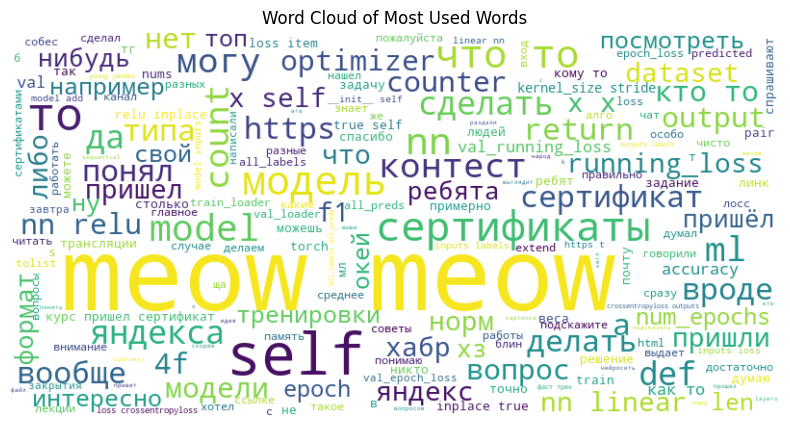

In [90]:
from telethon.tl.types import User, Message
from stop_words import get_stop_words
from wordcloud import WordCloud

stop_words = get_stop_words('russian')
all_messages_text = ' '.join(message.text.lower() for message in messages if isinstance(message, Message))
filtered_messages_text = ' '.join(word for word in all_messages_text.split() if word not in stop_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_messages_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Used Words')
plt.show()

## Сколько пользователей имеют аватарку

In [93]:
user_photos = [user.photo for user in users if user.photo]
num_users_with_photos = len(user_photos)
print(f"Количество пользователей с аватарками: {num_users_with_photos}")

Количество пользователей с аватарками: 4527


In [ ]:
import cv2
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

model = ResNet50(weights='imagenet')

def predict_object(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)

    return decoded_predictions[0][0][1]

for user_photo in user_photos:
    image_path = f"path_to_save_image/{user_photo.id}.jpg"
    user_photo.download_media(image_path)
    
    try:
        predicted_object = predict_object(image_path)
        print(f"На аватарке пользователя {user_photo.id} изображено: {predicted_object}")
    except Exception as e:
        print(f"Ошибка при анализе аватарки пользователя {user_photo.id}: {e}")


## Анализ канала

In [138]:
channel_name = 'dealerAI'
posts = await client.get_messages(channel_name, limit=100)

C:\Users\Никита\AppData\Local\Temp\ipykernel_19572\4026717793.py:2: RuntimeWarning: coroutine 'MessageMethods.get_messages' was never awaited
  posts = await client.get_messages(channel_name, limit=100)


In [161]:
text_with_high_views = ''
max_views = 0
max_num_reaction = 0

for idx, post in enumerate(posts):
    post_text = post.message
    num_view = post.views
    num_reaction = 0
    if post.reactions is not None:
        for result in post.reactions.results:
            num_reaction += result.count

        if num_view > max_views:
            max_views = num_view
            text_with_high_views = post_text
            max_num_reaction = num_reaction

In [163]:
print(f'Максимальное кол-во просмотров:{max_views}')
print(f'Суммарное кол-во реакций у этого поста:{max_num_reaction}')

Максимальное кол-во просмотров:6871
Суммарное кол-во реакций у этого поста:13


In [212]:
posts[0].id

403

In [224]:
max_replies = 0
for post in tqdm(posts):
    post_id = post.id
    messages = await client.get_messages(channel_name, ids=post_id)
    if messages.replies is not None:
        max_replies = max(max_replies, messages.replies.replies)

100%|██████████| 100/100 [00:18<00:00,  5.42it/s]


In [225]:
print(f'Максимальное кол-во комментариев на одном из последних 100 постов = {max_replies}')

Максимальное кол-во комментариев на одном из последних 100 постов = 39


### Найдем самое популярное эмодзи

In [268]:
emoji_counter = defaultdict(int)

for post in tqdm(posts):
    post_id = post.id
    message = await client.get_messages(channel_name, ids=post_id)

    if message.reactions is not None:
        for emoji in message.reactions.results:
            emoji_counter[emoji.reaction.emoticon] += emoji.count

100%|██████████| 100/100 [00:15<00:00,  6.53it/s]


In [270]:
sorted_emoji = sorted(emoji_counter.items(), key=lambda x: x[1], reverse=True)
print(f'Самое популярное emoji {sorted_emoji[0]}')

Самое популярное emoji ('🔥', 343)


### Найдем самого активного комментатора

In [331]:
message_from = defaultdict()
async with client:
    async for message in client.iter_messages(channel_name):
        if (message.replies):  
            print("Message ID:",message.id,'Count replies',message.replies.replies,'\n')
            print(message.replies)
            break


Message ID: 401 Count replies 13 

MessageReplies(replies=13, replies_pts=5304, comments=True, recent_repliers=[PeerChannel(channel_id=1808600736), PeerUser(user_id=6344385891), PeerUser(user_id=134731207)], channel_id=1808600736, max_id=2737, read_max_id=None)


In [345]:
top_commentator = defaultdict(int)
async for post in tqdm(posts):
    try:
        post_id = post.id
        async with client:
            async for message in client.iter_messages(channel_name, reply_to=post_id):
                
                if message.from_id is not None:
                    user_id = message.from_id
                    top_commentator[user_id] += 1
    except:
        pass

100%|██████████| 100/100 [01:17<00:00,  1.28it/s]


In [349]:
sorted_top_commentator = sorted(top_commentator.items(), key=lambda x: x[1], reverse=True)
print(f'Больше всех комментариев оставлял пользователь с id = {top_commentator[0]}')

Больше всех комментариев оставлял пользователь с id = 64466006


### Изучить тематику и ключевые слова в трех самых популярных постах

In [351]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached regex-2023.10.3-cp310-cp310-win_amd64.whl (269 kB)


You should consider upgrading via the 'D:\hacktons\diskra_3sem\env\Scripts\python.exe -m pip install --upgrade pip' command.
